# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy #change the kernal to Python Anaconda and it works, otherwise get Module error

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [1]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


NameError: name 'np' is not defined

In [19]:
# Print the city count to confirm sufficient count
print (len(cities))
#print(cities)
cities_df=pd.DataFrame(cities)
#print(cities_df)
len(cities_df[0].unique()) #check for duplicates
cities_df.rename(columns={cities_df.columns[0]:"city_name"}, inplace=True) #rename column [0] to city_name
print(cities_df)
len(cities_df["city_name"].value_counts())

596
                    city_name
0                   busselton
1                        hilo
2                       vaini
3                kruisfontein
4                attawapiskat
5                   upernavik
6                      tiarei
7                     rikitea
8                       kapaa
9                    plouzane
10             ribeira grande
11               mount vernon
12                      herne
13                   thompson
14                 bredasdorp
15                      yanam
16                       hami
17                 chokurdakh
18                 nikolskoye
19                     laguna
20                   kargasok
21                  jamestown
22                    vaitupu
23                new norfolk
24                     sorong
25                     barrow
26               punta arenas
27                  hithadhoo
28                 vila velha
29                    mataura
..                        ...
566  sao jose da coroa grande
567   

596

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
#df to store values from API calls
#set up DataFrame to hold the response info
column_names=["City", "Cloudiness", "Country", "Date", "Humidity", 
              "Lat", "Lng", "Max Temp", "Wind Speed"]
owmCities_df=pd.DataFrame(columns=column_names)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&appid={api_key}&units={units}&q="

#test to see the url works
response = requests.get(query_url)
print(response.status_code)

row_count=1
print ("Beginning Data Retrieval")
print("------------------------")
for index, row in cities_df.iterrows():
    city = row["city_name"]
    response = requests.get(query_url + city).json()
    if response["cod"] == "404":
        print("City not found, skip...")
        
    
    else:
        owmCities_df.set_value(index, "City", response["name"])
        owmCities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        owmCities_df.set_value(index, "Country", response["sys"]["country"])
        owmCities_df.set_value(index, "Date", response["dt"])
        owmCities_df.set_value(index, "Humidity", response["main"]["humidity"])
        owmCities_df.set_value(index, "Lat", response["coord"]["lat"])
        owmCities_df.set_value(index, "Lng", response["coord"]["lon"])
        owmCities_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        owmCities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        
        print("Processing Record " , row_count, '| ' , response["name"])
        row_count += 1





400
Beginning Data Retrieval
------------------------
Processing Record  1 |  Busselton


C:\Users\JF\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JF\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JF\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JF\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\JF\ANACONDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Processing Record  2 |  Hilo
Processing Record  3 |  Vaini
Processing Record  4 |  Kruisfontein
City not found, skip...
Processing Record  5 |  Upernavik
Processing Record  6 |  Tiarei
Processing Record  7 |  Rikitea
Processing Record  8 |  Kapaa
Processing Record  9 |  Plouzane
Processing Record  10 |  Ribeira Grande
Processing Record  11 |  Mount Vernon
Processing Record  12 |  Herne
Processing Record  13 |  Thompson
Processing Record  14 |  Bredasdorp
Processing Record  15 |  Yanam
Processing Record  16 |  Hami
Processing Record  17 |  Chokurdakh
Processing Record  18 |  Nikolskoye
Processing Record  19 |  Laguna
Processing Record  20 |  Kargasok
Processing Record  21 |  Jamestown
City not found, skip...
Processing Record  22 |  New Norfolk
Processing Record  23 |  Sorong
Processing Record  24 |  Barrow
Processing Record  25 |  Punta Arenas
Processing Record  26 |  Hithadhoo
Processing Record  27 |  Vila Velha
Processing Record  28 |  Mataura
Processing Record  29 |  Derzhavinsk
Pro

Processing Record  221 |  Souillac
Processing Record  222 |  Kaeo
Processing Record  223 |  Lompoc
Processing Record  224 |  Ananas
Processing Record  225 |  Sitka
Processing Record  226 |  Sola
Processing Record  227 |  Pangnirtung
Processing Record  228 |  Numan
Processing Record  229 |  Potrero del Llano
Processing Record  230 |  Fortuna
City not found, skip...
Processing Record  231 |  Bintulu
Processing Record  232 |  Severo-Kurilsk
Processing Record  233 |  Cabo San Lucas
Processing Record  234 |  Katobu
City not found, skip...
Processing Record  235 |  Aksha
Processing Record  236 |  Bombay
Processing Record  237 |  Scottsbluff
Processing Record  238 |  Bilibino
Processing Record  239 |  Ndjole
Processing Record  240 |  Portel
Processing Record  241 |  Saint-Augustin
Processing Record  242 |  Victoria
Processing Record  243 |  Forssa
Processing Record  244 |  Verkhnyaya Inta
Processing Record  245 |  Porto Novo
Processing Record  246 |  Banswara
Processing Record  247 |  Padang


Processing Record  441 |  Belen
Processing Record  442 |  Hasaki
Processing Record  443 |  Nome
Processing Record  444 |  Puerto Narino
Processing Record  445 |  Adrar
Processing Record  446 |  Gamba
Processing Record  447 |  Zheleznodorozhnyy
Processing Record  448 |  Hue
Processing Record  449 |  Inirida
Processing Record  450 |  Hervey Bay
Processing Record  451 |  Katsuura
Processing Record  452 |  Rundu
Processing Record  453 |  Coquimbo
Processing Record  454 |  Vikhorevka
Processing Record  455 |  Khorinsk
Processing Record  456 |  Tiruppuvanam
Processing Record  457 |  Cartagena
Processing Record  458 |  Jijiga
Processing Record  459 |  Laives
Processing Record  460 |  Barmer
City not found, skip...
Processing Record  461 |  San Nicolas
Processing Record  462 |  Amapa
Processing Record  463 |  Aksu
Processing Record  464 |  Boone
Processing Record  465 |  Bulungu
Processing Record  466 |  Kirensk
Processing Record  467 |  Magdagachi
Processing Record  468 |  Umm Kaddadah
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#owmCities_df.to_csv("output_data_file", index=False, header=True)

In [2]:
file="output_data_file"
weather_data=pd.read_csv(file)
weather_data.count()

City          538
Cloudiness    538
Country       535
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [3]:
weather_data["Max Temp"].max()
weather_data["Max Temp"].min()
weather_data["Lat"].max()
weather_data["Lat"].min()
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1541293456,100,-33.64,115.35,62.34,11.59
1,Hilo,40,US,1541289360,69,19.71,-155.08,82.04,11.41
2,Vaini,56,IN,1541293456,95,15.34,74.49,71.34,3.60
3,Kruisfontein,0,ZA,1541293249,70,-34.00,24.73,65.09,11.14
4,Upernavik,8,GL,1541291680,100,72.79,-56.15,19.50,11.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

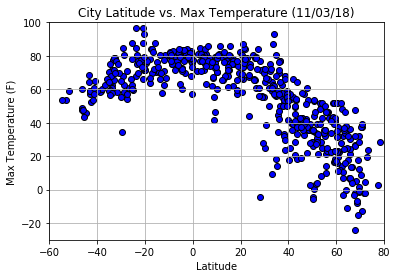

In [11]:
#Scatter plot for Latitude vs. Temperature
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"], c="blue", edgecolor="black", 
            linewidths=1, marker="o", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (11/03/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-30, 100])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [9]:
weather_data["Humidity"].max()
weather_data["Humidity"].min()
#weather_data["Lat"].max()
#weather_data["Lat"].min()
#weather_data.head()

7

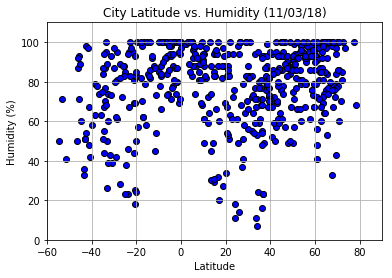

In [5]:
#Scatter plot for Latitude vs. Humidity
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"], c="blue", edgecolor="black", 
            linewidths=1, marker="o", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (11/03/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([0, 110])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

In [16]:
weather_data["Cloudiness"].max()
weather_data["Cloudiness"].min()
#weather_data["Lat"].max()
#weather_data["Lat"].min()
#weather_data.head()

0

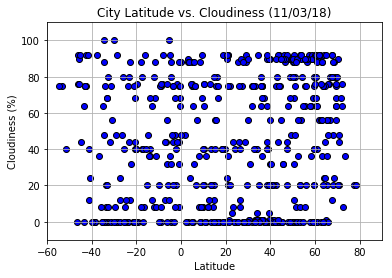

In [7]:
#Scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"], c="blue", edgecolor="black", 
            linewidths=1, marker="o", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (11/03/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [9]:
weather_data["Wind Speed"].max()
weather_data["Wind Speed"].min()
#weather_data["Lat"].max()
#weather_data["Lat"].min()
#weather_data.head()

0.29

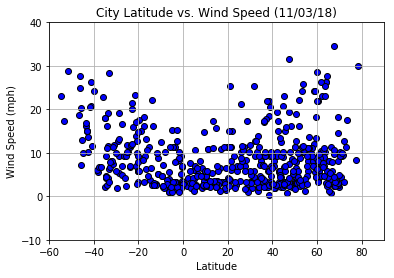

In [12]:
#Scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], 
            weather_data["Wind Speed"], c="blue", edgecolor="black", 
            linewidths=1, marker="o", label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (11/03/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 40])

# Save the figure
plt.savefig("Latitude_Wind_Speed.png")

# Show plot
plt.show()